In [1]:
import numpy as np
import pandas as pd

### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [4]:
df = pd.read_csv('dataset.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
X = df.drop('target', axis=1)
y = df['target']

there is no missing value in the dataset and as well as no categorical variable available, will scale the data after spliting the data in train test split

### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
print("Accuracy Score ", accuracy_score(y_test, y_pred))
print("Precision Score ", precision_score(y_test, y_pred))
print("Recall Score ", recall_score(y_test, y_pred))
print("F1 Score ", f1_score(y_test, y_pred))

Accuracy Score  0.8241758241758241
Precision Score  0.8269230769230769
Recall Score  0.86
F1 Score  0.8431372549019608


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [18]:
model.feature_importances_

array([0.08059834, 0.0287    , 0.12814776, 0.07362594, 0.06746576,
       0.01107919, 0.01561339, 0.11880734, 0.06220501, 0.10823809,
       0.053766  , 0.13167234, 0.12008084])

In [22]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [31]:
important_feat = pd.DataFrame({'Important_Featres':X_train.columns,  'Values':model.feature_importances_})

In [35]:
important_feat.sort_values(by='Values', ascending=False).head(5)

,Important_Featres,Values
11,ca,0.135975
12,thal,0.119573
7,thalach,0.109072
2,cp,0.105540
9,oldpeak,0.101059


### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [36]:
parameter = {
    'max_depth' :[5,10,15,20,25,30],
    'n_estimators':[50,100,200,300, 400],
    'min_samples_split' : [2,5,10,20,25,40],
    'min_samples_leaf' : [1,3,5,7,9,11]
    
}

In [37]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameter, cv=5, verbose=3, scoring='accuracy')

In [47]:
grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.0s
[CV 

[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.860 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.690 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=20, n_estimators=50;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_s

[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=300;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=400;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=40, n_estimators=400;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=200;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=200;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=40, n_estimators=200;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_sample

[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_sample

[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=40, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_sample

[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_sample

[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_sample

[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=11, m

[CV 5/5] END max_depth=5, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=11, min_samples_split=40, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=11, min_sa

[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.714 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.857 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_sampl

[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=25, n_estimators=400;, score=0.762 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=1, m

[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.860 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.714 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_sampl

[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=3, m

[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_sampl

[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=5, m

[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_sampl

[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=7, m

[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_sampl

[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=9, m

[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=400;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_s

[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=20, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=11, min_samples_split=25, n_estimators=50;, score=0.953 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=11, min_samples_split=25, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_lea

[CV 4/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.860 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.857 total time=   0.1s
[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=15, min_samples_leaf=1, min_sampl

[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=1, m

[CV 1/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=3, min_sampl

[CV 1/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=3, m

[CV 5/5] END max_depth=15, min_samples_leaf=3, min_samples_split=40, n_estimators=400;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_s

[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.738 total time=   0.2s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=5, min_

[CV 5/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=200;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.884 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=40, n_estimators=400;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=5, m

[CV 5/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=7, m

[CV 1/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=7, m

[CV 2/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=9, m

[CV 1/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=9, m

[CV 5/5] END max_depth=15, min_samples_leaf=11, min_samples_split=5, n_estimators=400;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=15, min_samples_leaf=11

[CV 4/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=15, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=15, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.814 total time=   0.0s
[CV 2/5] END max_depth=15, min_samples_le

[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.690 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_sampl

[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=1, m

[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=3, min_sampl

[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=3, m

[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_sampl

[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=5, m

[CV 2/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.810 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=7, min_sampl

[CV 2/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=7, m

[CV 1/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=9, min_sampl

[CV 1/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=9, m

[CV 5/5] END max_depth=20, min_samples_leaf=11, min_samples_split=2, n_estimators=400;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=11, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=11, min_s

[CV 4/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=300;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=11, min_samples_split=25, n_estimators=50;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_le

[CV 3/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.690 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.837 total time=   0.1s
[CV 2/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.690 total time=   0.1s
[CV 4/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=1, min_sampl

[CV 5/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=200;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=25, min_samples_leaf=1, min_samples_split=20, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=25, min_samples_leaf=1, m

[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=3, min_sampl

[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=3, min_samples_split=20, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=3, m

[CV 5/5] END max_depth=25, min_samples_leaf=3, min_samples_split=40, n_estimators=400;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_s

[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.714 total time=   0.1s
[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=400;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.814 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=5, min_

[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=200;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=25, min_samples_leaf=5, min_samples_split=40, n_estimators=400;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=25, min_samples_leaf=5, m

[CV 1/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=200;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=25, min_samples_leaf=7, min_samples_split=10, n_estimators=300;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=25, min_samples_leaf=7, m

[CV 1/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.881 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=7, min_samples_split=40, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=7, m

[CV 2/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=9, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=9, m

[CV 1/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=9, min_samples_split=40, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=9, m

[CV 5/5] END max_depth=25, min_samples_leaf=11, min_samples_split=5, n_estimators=400;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_leaf=11, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=25, min_samples_leaf=11

[CV 4/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=300;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=25, min_samples_leaf=11, min_samples_split=25, n_estimators=400;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=25, min_samples_leaf=11, min_samples_split=40, n_estimators=50;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=25, min_samples_le

[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.714 total time=   0.1s
[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.881 total time=   0.1s
[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.860 total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=1, min_sampl

[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.907 total time=   0.1s
[CV 2/5] END max_depth=30, min_samples_leaf=1, min_samples_split=25, n_estimators=300;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=30, min_samples_leaf=1, m

[CV 2/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.690 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=3, min_sampl

[CV 1/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=3, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=3, m

[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_sampl

[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=5, min_samples_split=25, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=5, m

[CV 2/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=7, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=7, min_sampl

[CV 1/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.907 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=100;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=7, min_samples_split=25, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=7, m

[CV 2/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=9, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=9, min_sampl

[CV 1/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.714 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=100;, score=0.738 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=9, min_samples_split=25, n_estimators=200;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=9, m

[CV 5/5] END max_depth=30, min_samples_leaf=11, min_samples_split=2, n_estimators=400;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.738 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=11, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=11, min_s

[CV 4/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=300;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=300;, score=0.786 total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.762 total time=   0.1s
[CV 4/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=30, min_samples_leaf=11, min_samples_split=20, n_estimators=400;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=30, min_samples_leaf=11, min_samples_split=25, n_estimators=50;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_le

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                         'min_samples_split': [2, 5, 10, 20, 25, 40],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy', verbose=3)

In [48]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 40,
 'n_estimators': 50}

In [49]:
grid.best_score_

0.8580287929125138

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [50]:
print("Best Parameter : ", grid.best_params_)
print("Accuracy for Hyperpermeter : ", grid.best_score_)
print("Accuracy of  default model :", accuracy_score(y_test, y_pred))

Best Parameter :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 40, 'n_estimators': 50}
Accuracy for Hyperpermeter :  0.8580287929125138
Accuracy of  default model : 0.8241758241758241


### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [75]:
important_features = np.argsort(model.feature_importances_)[::-1][:2]
X_important_train = X_train.iloc[:, important_features]
X_important_test = X_test.iloc[:,important_features]

model.fit(X_important_train, y_train)


RandomForestClassifier(max_depth=10)

In [78]:
x_min, x_max = X_important_train.iloc[:, 0].min() - 1, X_important_train.iloc[:, 0].max() + 1
y_min, y_max = X_important_train.iloc[:, 1].min() - 1, X_important_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [80]:
# Predict on the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\Suraj Singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


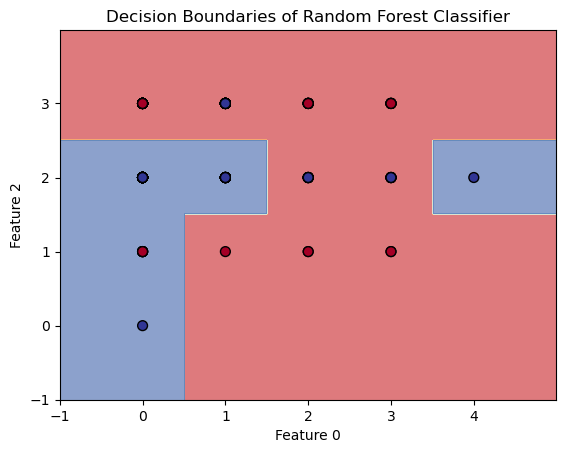

In [86]:
# Create a contour plot
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.xlabel("Feature 0")
plt.ylabel("Feature 2")

# Plot the training points
plt.scatter(X_important_train.iloc[:, 0], X_important_train.iloc[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='o', edgecolor='k', s=50)
plt.title("Decision Boundaries of Random Forest Classifier")

plt.show()